# Data Science 1 : rappel d’algèbre linéaire (espaces vectoriels) et illustration avec le clustering

Enseignant : Jean Delpech

Cours : Data Science

Classe : M1 Data/IA

Année scolaire : 2025/2026

Dernière mise à jour : novembre 2025

L’objectif de ce cours est de présenter les bases de l’algèbre linéaire, et, à l’aide de cet outil, vous permettre de comprendre un algorithme de clustering (k-means) et de l’implémenter.

Nous verrons dans ce premier chapitre les notions de vecteurs, d’espace vectoriel, de produit scalaire, de norme, de distance, de barycentre, de variance et d’inertie, des notions mobilisées dans l’algorithme k-means.

Dans le chapitre suivant nous poursuivrons notre découverte de l’algèbre linéaire avec les matrices, les opérations matricielles, les transformations linéaires, les projections, etc. pour cette fois comprendre et implémenter une technique de réduction de dimensions : l’analyse en composantes principales.

Ces deux chapitres sont extrèmement importants car il présente des concepts qui seront utiles en exploration et analyse de données, en machine learning et même en deep learning. J’assume donc parfaitement de présenter un contenu détaillé, même si, bien entendu vu le temps imparti, je n’exposerai pas en toute rigueur les démonstrations formelles. Néanmoins il est absolument nécessaire d’acquérir une intuition de ces concepts. C’est pour ça que j’ai choisi aussi de commencer par un exposé historique car il me semble que bien trop souvent on présente l’algèbre linéaire sans expliquer vraiment sa raison d’être et comment il a été développé. Cette première section, intitulé « Généralités » pourra sembler un peu assomante, mais, à ce titre, gardez à l’esprit que si ce notebook est conçu pour être lu et relu de manière autonome, un exposé en présentiel est essentiel pour en préparer et guider la lecture.

## Ressources pour ce cours

* Pour une introduction rigoureuse (Niveau L1 fac de math) : *Algèbre, cours de Mathématiques 1ère année*. Disponible en ligne [ici](http://exo7.emath.fr/cours/livre-algebre-1.pdf), impression à la demande pour moins de 10€ sur Amazon. [Le site Exo7](http://exo7.emath.fr) est une super ressource en math et computer science ! Plus tard vous pourrez aussi jeter un œil sur [DeepMath](https://exo7math.github.io/deepmath-exo7/) lors de votre cours de deep learning. Ils ont aussi une chaîne Youtube
* Un excellent ouvrage, très accessible et appliqué en python (anglais) : *Essential math for datascience*, Hadrien Jean, auto-édition. Son site : https://www.essentialmathfordatascience.com/
* Un ouvrage plus concis, écrit par un data scientist : *70 Concepts mathématiques expliqués avec Python*, Guillaume Saupin, Dunod 2023
* Un ouvrage de référence (anglais) : *Linear Algebra and Optimization for Machine Learning - A Textbook*, Charu C. Aggarwal, Springer 2020
* L’excellente chaîne [3 blue one brown](https://www.youtube.com/@3blue1brown) qui vulgarise avec beaucoup de pédagogie par de courtes animations très bien conçues, pour ce cours nous retiendrons évidemment [cette playlist](https://www.youtube.com/watch?v=fNk_zzaMoSs&list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab) sur l’algèbre linéaire (sous-titres disponibles en français)

In [68]:
#!pip install numpy=2.3.4
#!pip install matplotlib=3.10.17
#!pip install scikit-learn=1.7.0 (utile seulement pour le dernier exercice)
#!pip install jupyterlab=4.4.10
#!pip install jupyterlab-mathjax2=4.0.0 # installer s’il y a des pb dans l’affichage des formules

## Algèbre linéaire - Généralités

Techniquement, ces généralités ne devraient être qu’un rappel, mais je vais en profiter pour évoquer les concepts de l’algèbre linéaire en partant d’une perspective historique afin de bien comprendre ce qui a motivé le développement de ce domaine des mathématiques. Cette présentation (rapide) des concepts que nous étudierons dans ce cours sera également une présentation du plan du cours.

### Définition et équations algébriques

Qu’est-ce que l’algébre ? C’est un mot que vous avez certainement déjà rencontré, mais êtes-vous capable de dire ce qu’il désigne ?

Regardons dans un dictionnaire, par exemple le [Wiktionnaire](https://fr.wiktionary.org/wiki/alg%C3%A8bre), un dictionnaire collaboratif de la [Fondation Wikimédia](https://wikimediafoundation.org/) qui édite Wikipédia :

```
Algèbre : 1.(Mathématiques) Branche des mathématiques qui étudie les structures algébriques, hors des notions de limite (rattachée à l’analyse) et de représentation graphique (concernant la géométrie).
```

définition typique d’un dictionnaire me direz-vous, un brin circulaire, et qui ne nous avance pas beaucoup.

(et par ailleurs :)

```
4. (Sens figuré) (Familier) Se dit en parlant de quelque chose difficile à comprendre.
-> C’est de l’algèbre pour lui.
```

Le [dictionnaire de l’Académie Française](https://www.dictionnaire-academie.fr/article/A9A1153) :

```
Branche des mathématiques dans laquelle, les grandeurs et les nombres étant représentés par des lettres, les problèmes sont résolus par des formules.
```

ou encore le [Trésor de la langue française](http://stella.atilf.fr/Dendien/scripts/tlfiv5/advanced.exe?8;s=3191975505;) est peut-être plus éclairant ?

```
Algèbre : A. [Le plus souvent au sing.] Branche des mathématiques ayant pour objet de simplifier et de résoudre au moyen de formules des problèmes où les grandeurs sont représentées par des symboles, et d'en généraliser les résultats.
```

Si vous avez fait des mathématiques au collège ou au lycée, cela vous renverra sûrement aux équation polynomiales, que l’on appelle aussi, précisément, *équations algébriques* :

$$
a_n x^n + a_{n-1} x^{n-1} + … + a_1 x + a_0
$$ 

Ces équations permettent de formaliser un ensemble de problèmes simples, ou plus compliqués : calculer le prix de 3 kg de tomates connaissance le prix au kilo, comment se vide une baignoire percer qu’on remplit, comment optimiser les revenus de vente d’un produit, jusqu’à calculer la trajectoire parabolique d’un projectile, en couplant deux équations du second degré qui vont donner la position x et y, en fonction du temps, et qu’on peut réunir en une équation unique qui va être celle d’une parabole.

Par exemple, Marseille et Paris sont distantes de 900km
Le TGV se déplace à 300km/h
Combien de temps faut-il pour rallier Paris depuis Marseille en TGV ?

On distinguera ici deux activités :

* rechercher une solutions particulière à une équation, c’est l’objet du calcul numérique, ici on procédera en calculant 900/300 = 3 heures
* rechercher une solution générale à une équation, cette fois ci nous faisons de l’algèbre en répondant ainsi : soit d la distance, v la vitesse et x la valeur (inconnue) que nous recherchons, alors x = d/v. L’algèbre répondra il faut *d/v* heures, réponse valabel quelle que soit les vitesses et les distances considérées.

Ce premier niveau d’abstraction – dû à [François Viète]((https://fr.wikipedia.org/wiki/Fran%C3%A7ois_Vi%C3%A8te)), nous retrouverons ce nom plus loin – permet de manipuler des grandeurs sans en connaîre la valeur. On peut ensuite utiliser sur ces abstractions les 4 opérations usuelles (+, -, × et /) selon des règles définie (priorité, associativité, etc.)

Nous allons voir que ce n’est pas le dernier niveau d’abstraction qu’à produit l’algèbre, cette discipline à donné naissance à des structures « encore plus » abstraites, ces structures étant définies par des ensembles d’objets (que l’on appellera plutôt *éléments*) d’une part et d’autre part les opérations que l’on va appliquer à ces éléments (et les propriétés de ces opérations). De là à ce que l’on utilise des variables (abstraites) pour représenter des objets exotiques plus sophistiqués que de simples nombres.

Note : les opérations vont être caractérisées par certaines propriétés : à quel ensemble appartient le résultat de l’opération (est ce que si on effectue une opération sur deux éléments d’un ensemble, le résultat est-il encore un élément de cet ensemble, ou autre chose ?), est qu’il y a des éléments particuliers qui affectent le résultat de manière singulière (élément nul, identité), y a-t-il des propriétés particulières (l’ordre des opérations a-t-il une importance - commutativité, associativité, etc.)

Pour donner un exemple et spoiler un peu, la structure « espace vectoriel » est définie par deux ensembles : 

* celui des vecteurs (on reviendra sur la définition plus bas)
* et celui des scalaires (idem)

Et du point de vue des opérations :

* les vecteurs connaissent une opération qui produit un autre vecteur : l’addition (on peut ajouter deux vecteurs, on obtiendra un autre vecteur)
* et la multiplication avec un scalaire, qui produira aussi un vecteur, qui aura changé d’échelle
* et la multiplication entre vecteurs ? On ne « peut pas » multiplier deux vecteurs. On parlera de *produit scalaire* car le résultat sera non pas un vecteur, mais un scalaire.

Nous reviendrons sur tout cela plus en détail, il s’agit juste d’illusttrer la manière dont on construit les structures algébriques.


### Point de vue historique et structures algébriques

Toujours selon le Wiktionnary : 

```
Étymologie : (XIVe siècle) Via le latin médiéval algebra, de l’arabe الجبر, āl-ǧabr
```

En réalité tout vient d’un mathématicien persan de langue arabe : [Al-Khawarizmi](https://fr.wikipedia.org/wiki/Al-Khw%C3%A2rizm%C3%AE), qui, cherchant a résoudre de manière systématique les équations du premier et du second degré, écrivit un traité au IXe siècle : *Abrégé du calcul par la restauration et la comparaison* (en arabe : 'الكتاب المختصر في حساب الجبر والمقابلة, Kitāb al-mukhtaṣar fī ḥisāb **āl-ǧabr** wa-l-muqābala).

On traduit aussi *āl-ǧabr* par « réduction » (d’une fracture), il s’agit de l’opération qui consiste à « faire passer » un membre négatif d’une équation par addition de chaque côté de l’équation :

$$
2x^2 = 3x − 3x^2\\
\text{par « āl-ǧabr » on obtient :}\\
x^2 + 3x^2 = 40x - 3x^2 + 3x^2\\
4x^2 = 40x 
$$

Fun facts : 
1. la notation sous forme d’équation avec des x, etc. date du XVIIe s. Auparavant on écrivait de manière textuelle avec des abrévations.
2. c’est d’Al-Khawarizmi que vient aussi le mot *algorithme*, son nom ayant été latinisé en *Algoritmi* dans une traduction d’un autre de ses ouvrages : *Algoritmi de numero Indorum* (Algorithme des nombres indiens).
3. on peut trouver ici une [chronologie de l’algèbre](https://fr.wikipedia.org/wiki/Chronologie_de_l%27alg%C3%A8bre) qui montre que les premières réflexions sur le sujet remonte à bien avant le IXe s.

Résoudre ces équations demande de réaliser des calculs sur les nombres, de manipuler des inconnues, donc algèbre et arithmétique ont longtemps été fortement liées. C’est ainsi que l’on a bâti des méthodes systématiques qui permettaient de résoudre des problèmes liés à des équations d’ordres de plus en plus élevés, jusqu’au degré trois et quatre (XVIIe / XVIIIe). Pour ce faire, il a fallu se confronter à des opérations impossibles à réaliser : calculer les racines carrées de nombres négatifs (XVIe s.). Ainsi c’est [Gerolamo Cardano](https://fr.wikipedia.org/wiki/J%C3%A9r%C3%B4me_Cardan) qui le premier a *imaginé* cette possibilité, mais c’est [Raffaele Bobelli]() qui a commencer à formaliser les calculs sur les nombres complexes (qu’il appelait nombres sophistiqués). 

![Couverture L’Algebra de Bombelli](./images/Algebra-Bombelli.webp)

Ainsi en partant de calculs sur les nombres, on a commencé à désigner de nouveaux objets (racines - carrées et cubiques -, carrés de racines, puis nombres complexes…), des collections de ces objets (ensembles), etc. On se focalisait encore sur les propriétés des objets sur lesquels on réalisait les calculs.

Mais par la suite on s’est confronté à un mur : les équations du 5e degré. On ne trouvait pas de formule pour exprimer les racines de ces équations (pourtant ces racines existent) en fonction des coefficients de la même manière qu’on pouvait par exemple exprimer les racines d’une équation de degré 2 avec la fameuse formule :

$$ 
\frac{–b ± \sqrt{b^2 – 4ac}}{2a}
$$

La question n’était pas tant de trouver une formule équivalente pour le degré 5 que de comprendre *pourquoi* on n’en trouvait pas. Et répondre à cette question allait conduire à un bon conceptuel énorme pour la théorie mathématique.

Au début du XIXe siècle les travaux de [Ruffini](https://fr.wikipedia.org/wiki/Paolo_Ruffini_(math%C3%A9maticien)), [Abel](https://fr.wikipedia.org/wiki/Niels_Henrik_Abel) et [Galois](https://fr.wikipedia.org/wiki/%C3%89variste_Galois) allaient justement permettre de répondre à cette question.

Il est bien entendu hors de question de plonger ici dans la théorie des groupes (permutation, symétrie) ou d’exposer la démonstration formelle de l’inexistance de solutions sous forme de radicaux aux équations de degrés > 4. Mais voici de quoi nourrir quelques intuitions (vous pouvez sauter ce passage) :

- dire qu’on ne peut écrire les racines des équations de degré supérieur à 4 sous la forme de radicaux, c’est dire qu’on ne peut pas utiliser les **opérations** **+**, **-**, **×**, **/** et **√** sur les coefficients pour écrire une formule donnant la solution, même si la racine existe : ce sont nos outils qui font défaut
  
- considérons une equation du second degré $ax^2 + bx +c = 0$  comme $x^2 - 5x + 6 = 0$. Ses racines sont 2 et 3.
  On sait aussi qu’il existe des relations particulières entre les racines d’un polynôme et ses coefficients (relations de Viète) :
  
  $$
  r_1 + r_2 = \frac{-b}{a} \\
  r_1 . r_2 = \frac{c}{a}
  $$
  
  Ici, on constate aisément que ces relations sont respectées que r<sub>1</sub> = 2 et r<sub>2</sub> = 3 ou que r<sub>1</sub> = 3 et r<sub>2</sub> = 2. On peut *permuter* les racines et ça ne change strictement rien (tellement rien qu’on ne voit pas trop l’intérêt de l’opération).
- Dans le cas d’une équation de degré 3, $ax^3 + bx^2 +cx + d = 0$   les relations de Viète sont un peu plus compliquées :

  $$
  r_1 + r_2 + r_3 = \frac{-b}{a} \\
  r_1 . r_2 + r_1 . r_3 + r_2 . r_2 = \frac{c}{a} \\
  r_1 . r_2 . r_3 = \frac{-d}{a}
  $$
  
  Mais on peut rapidemenet vérifier ces opérations dans le cas d’une équations comme $x^3 - 6x^2 + 11x - 6 = 0$ dont les racines sont 1, 2 et 3.
  On remarque néanmoins que le nombre de permutations augmente nettement : on peut faire 6 (=3!) permutations entre les racines : (1, 2, 3), (3, 2, 1), (2, 3, 1), etc.
  Mais les relations de Viète sont toujours valables si on se donne la peine de calculer.
- Par contre, pour une équation de degré 5, le nombre de permutation est de 5! = 120. Parmi toute ces permutations, on peut en trouver un sous-groupe pour lesquelles l’ordre dans lesquels on va effectuer les opérations (ou « transformations ») aura son importance (les opérations ou « transformations »  ne sont pas commutatives). Les racines appartiennent donc à une structure où les « lois » qui régissent les opérations que l’on peut effectuer ne nous donnent pas toutes les possibilités. Et donc, on est bloqué !

Ce qu’il faut retenir, c’est qu’on est passé d’une démarche où l’on se demandait **« de quelle manière peut-on calculer la solutions »** à une approche structurale, en quelque sorte **« quelle est la nature du problème ? »**. Par exemple Galois a découvert que les permutations possibles des racines forment une *structure* – ce qu'on appellera plus tard un *groupe* – et que la possibilité d’écrire une formule mettant en jeu les coefficient et les opérations usuelles dépend des propriétés de cette structure (en matière de permutation/symétrie).

Cette approche change radicalement la nature de l'algèbre. On passe de :

- « Comment calculer des solutions ? »
à
- « Quelles structures gouvernent les calculs de la solution ? »

On va donc se focaliser sur les opérations et leurs propriétés et non juste sur les objets sur lesquels on réalise les opérations. On va examiner les objets par le biais des opérations que l’on peut réaliser dessus en quelque sorte.
Au cours du XIXe s., les mathématiciens vont donc beaucoup s’amuser à identifier et définir (axiomatiser) plusieurs structures fondamentales, en fonction des opérations considérées (addition, produit…) et de leurs propriété (associative, commutatives, avec un élément nul, identité, etc.) :

- Les groupes : structures avec une opération (loi de composition) associative, qui possède un élément neutre, et pour laquelle tout élément du groupe est inversible (exemple : (Z, +))
- Les anneaux : structures avec deux opérations (p. ex. addition et multiplication)
- Les corps : anneaux où tout élément non nul a un inverse selon la deuxième opération
- Les espaces vectoriels : un groupe additif (pour pouvoir ajouter / soustraire des vecteurs pour en obtenir un troisième), associé à un corps pour pouvoir multiplier chaque vecteur par un facteur λ. C’est ce qui va nous occuper dans la suite.

Note : les mêmes structures apparaissent dans des contextes mathématiques très différents, unifiant ainsi des domaines auparavant séparés (exemple géométrie). Par ailleurs la théorie des groupes va avoir une importance capitale en physique théorique, ou encore pour modèliser un Rubik’s Cube, mais aussi en cryptographie, cristallographie, algorithmie (graphes, correction d’erreur, etc.) computer vision/robotique, etc.

### Passage à l’algèbre linéaire

Rappel : en mathématique, linéaire = relation de proportionalité (nous y reviendrons)

Au cours du XIXe s. plusieurs problèmes (encore et toujours) concourrent à faire émerger la notion d’espace vectoriel et donc au développement de l’algèbre linéaire.

Quels sont ces problèmes ?

#### 1. Systèmes d’équations linéaires

Tous les lycéens (ou collégiens) ont déjà été exposés à des problèmes formalisés par des systèmes d’équation linéaires :

```
2x + 3y = 7
4x - y = 5
```

Il existe de nombreuses méthodes pour résoudre de tels systèmes, certaines connues depuis le IIe s. en Chine via l’ouvrage *Les Neufs Chapitres sur l’art mathématique*, que Cardano (déjà cité) a fait connaître en Europe, qui utilise des tableaux et introduit la notion de déterminant. La méthode de résolution par substitution est la plus accessible, et vous vous souvenez certainement avoir entendu parlé de la méthode de Cramer. [Gauss](https://fr.wikipedia.org/wiki/Carl_Friedrich_Gauss) (début XIXe) systématise une méthode générale : le pivot de Gauss (ou méthode d’élimination de Gauss-Jordan) applicable à n équations à n inconnues. Il introduit implicitement la notion de manipulation de lignes d'un tableau de coefficients – ce qu'on appellera une **matrice**.
  
#### 2. La géométrie

- [Grassman](https://fr.wikipedia.org/wiki/Hermann_G%C3%BCnther_Grassmann) définit des objets géométriques (points, droites, plans) comme des combinaisons linéaires et introduit des opérations entre eux. C'est la naissance conceptuelle des **espaces vectoriels**.

- [Hamilton](https://fr.wikipedia.org/wiki/William_Rowan_Hamilton) travaille sur le calcul des rotations dans l’espace (3D), et pour cela découvre les quaternions, et en les étudiant qu’on peut définir une  forme de multiplication pour les quaternions qui se révèlera non commutative (ce sera le premier exemple de corps non commutatif). 

#### 3. Les matrices

[Cayley](https://fr.wikipedia.org/wiki/Arthur_Cayley) définit formellement les **matrices** comme des objets mathématiques à part entière, avec leurs propres règles de calcul (addition, multiplication). Il synthétisera les approches vu précédemment et montrera qu'une matrice peut représenter :
- Un système d'équations linéaires
- Une transformation géométrique (rotation, projection, homothétie)
- Un changement de coordonnées

### Revenons aux espaces vectoriels
À la fin du XIXe siècle, [Peano](https://fr.wikipedia.org/wiki/Giuseppe_Peano) donne la définition axiomatique moderne d'un espace vectoriel (évoquée ci-dessus) : un ensemble muni d'une addition (interne) et d'une multiplication par des scalaires satisfaisant certains axiomes (associativité, commutativité, distributivité, etc.).
Cette définition abstraite révèle que des objets très différents partagent la même structure :

* Les vecteurs géométriques du plan ou de l'espace
* Les polynômes de degré n
* Les fonctions continues sur un intervalle
* Les matrices de taille donnée
* [Ici (Wikipedia) une liste d’espaces vectoriels](https://fr.wikipedia.org/wiki/Exemples_d%27espaces_vectoriels#Le_corps) (pour les curieux-ses)

Tous sont des espaces vectoriels et obéissent aux mêmes règles algébriques !
Les opérations importantes à retenir sont l’addition de vecteurs, et la multiplication par un scalaire. On comprend ici l’adjectif « linéaire », si on se rappelle que cela renvoie à la notion de relation de proportionalité (donc la multiplication par une valeur).

Nous verrons plus bas une définition formelle, pour le moment nous présentons l’ensemble des concepts que nous verrons dans ce cours de manière générale.

#### Les transformations linéaires

Lorsque nous allons manipuler des vecteurs avec diverses opérations, un concept central va être celui de transformation linéaire (ou application linéaire) : une fonction T entre espaces vectoriels qui préserve la structure :

$$
T(u + v) = T(u) + T(v) \\
T(\alpha u) = \alpha T(u)
$$

Les matrices vont jouer un rôle particulièrement important ici. Les transformations linéaires peuvent être représentées par des matrices, et réciproquement, toute matrice définit une transformation linéaire.

Nous verrons que l’on peut très facilement interpréter les transformations linéaires géométriquement.

Les transformations linéaires ont des propriétés tout à fait intéressantes : une transformation linéaire préserve :

* L'origine (T(0) = 0)
* Les lignes droites restent des lignes droites
* Les parallèles restent parallèles
* Les proportions sur les droites

Pour fixer les idées, par exemple, une transformation linéaire peut appliquer les transformations suivantes :

* Étirer/comprimer
* Faire des rotations
* Faire des réflexions (symétries)
* Projeter sur un sous-espace
* Cisailler (shear)

Nous implémenterons, dans le cours suivant sur les matrices, avec des petits exercices géométriques toutes ces opérations afin d’en avoir une bonne compréhension « concrète ».

Ces transformations linéaires seront l’occasion d’introduire la notion de **vecteurs propres** 

Ces vecteurs propres correspondront à des directions privilégiées. Certains vecteurs, sous l'action d'une transformation, gardent leur **direction** mais changent seulement de **longueur**.

Un vecteur (non nul) v est un vecteur propre de la transformation T s'il existe un scalaire λ tel que :

$$
T v = \lambda v
$$

- v : vecteur propre
- λ : valeur propre (eigenvalue)

Appliquer T à v revient simplement à multiplier v par λ.

#### La théorie spectrale

Cette notion de valeur propre et de « direction privilégiée » va nous amener à aller un peu plus loin. 

Suite à un long développement (depuis la mécanique de Lagrange, etc.), le théorème spectral ([Weierstrass](https://fr.wikipedia.org/wiki/Karl_Weierstrass)) montre que certaines transformations linéaires peuvent être "diagonalisées" (la matrice qui représente cette transformation peut être résumée à une simple diagonale) : ainsi on peut trouver une base où la transformation devient particulièrement simple.

Nous étudierons spécifiquement cela avec la PCA ou ACP (Analyse en Composantes Principales) : nous allons chercher à diagonaliser la matrice de covariance pour trouver les directions de variance maximale (pas de panique, c’est beaucoup plus simple que ce que ça en a l’air).

On dépasse ici le cadre de ce cours, mais sachez que ce principe peut être d’une certaine manière « généralisé » à toute matrice rectangulaire (factorisation), ce que l’on appelle la SVD (Décomposition en Valeurs Singulières), ce qui trouve des applications en statistique, en compression d'images, décomposition de signal, météorologie, etc. et même en reconnaissance de visages (cf [eigenfaces](https://en.wikipedia.org/wiki/Eigenface)).

#### Lien avec la data science

De nombreux problèmes en data science font intervenir l’algèbre linéaire :

* Représentation des données : Un jeu de données avec n observations et p variables est naturellement une matrice n × p, donc un objet d'algèbre linéaire.

* Transformations : Les algorithmes de machine learning (régression, réseaux de neurones, etc.) sont essentiellement des compositions de transformations linéaires et non-linéaires.

* Optimisation : Minimiser une fonction de coût (comme en régression linéaire) revient à résoudre un système d'équations linéaires (équations normales) ou à trouver des directions de descente (gradient).

* Compression et réduction de dimension : Les méthodes comme PCA, SVD, [t-SNE](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding) reposent toutes sur l'algèbre linéaire pour extraire l'information essentielle.

Ainsi, l'algèbre linéaire n'est pas qu'un outil technique : c'est le langage naturel pour penser les données multidimensionnelles et leurs transformations.

Nous allons donc dans les rappels mathématiques de ce cours explorer différents objets (scalaires, vecteurs, matrices) et les opérations que nous pourrons définir sur ceux-ci, et voir comment cela nous permet de résoudre deux problèmes accessibles et courant en analyse exploratoire de données : le clustering et la réduction de dimensions.


## Vecteurs et espaces vectoriels

Alors que nous venons de voir que l’algèbre est issu de la résolution d’équations polynomiales, point de départ qui peut sembler d’un horizon relativement restreint, nous avons aussi évoqué les liens entre cette discipline et la géométrie. En effet, c’est de manière géométrique qu’il est le plus facile de saisir les concepts de l’algèbre linéaire.

N’oublions pas que la géométrie pour sa part a pour objet l’étude de l’espace, dont elle a sans cesse construit un modèle toujours plus sophistiqué : 
* la géométrie euclidienne pour les figures dans le plan et l’espace
* la géométrie projective quand il a fallu créer des cartes et étudier la perspective
* la géométrie algébrique pour l’étude des courbes et surfaces définies par des équations algébriques
* la géométrie de Riemann pour l’étude des longueurs dans des espaces courbes (physique relativiste… ou ballistique)

La géométrie ce n’est donc pas seulement calculer des aires ou des périmètres de rectangles ou de triangles :) La géométrie a toujours bénéficié des outils développés dans les autres domaines mathématiques, avec par exemple la géométrie analytique pour l’étude d’objets décrits par des équations dans un système de coordonnées, et la géométrie différentielle avec l’utilisation des outils du calcul différentiel (pour l’étude des courbures).

C’est fort à propos qu’elle va nous permettre de construire une représentation intuitive des vecteurs et espaces vectoriels.



### Vecteurs

En géométrie nous avons appris que nous pouvons représenter des points dans un plan par un couple de valeur : les coordonnées (3 valeurs dans un espace tridimensionnel). Nous avons donc déjà manipulé des objets mathématiques qui sont un peu plus complexes que de simples nombres.

$$
A(2, 4) \\
B(-1, 3) \\
\\
A + B \text{ ????}
$$

Mais des opérations comme additionner des points (leurs coordonnées), ou les multipler par une grandeur n’a aucun sens !

Par ailleurs, vous avez sûrement connu une première familiarisation avec les vecteurs dans les cours de physique où différentes grandeurs (vitesses, forces, poids…) étaient représentées dans l’espace par des « flèches ». Et ces flèches étaient positionnées un peu partout dans l’espace (en général sur des points d’intérêt : centre de gravité de mobiles, points  d’appuis, etc.).

Ce que vous avez sûrement retenu, c’est que de manière analogue aux points du plan, on pouvait représenter les vecteurs par des couples de nombres (ou plus, dans un espace tridimensionnel), par contre cela faisait sens dans ce cas de les ajouter entre eux, de les multiplier par d’autres grandeurs, etc. ce qui aboutissait à d’autres vecteurs, ce qui est un point capital dans la définition des espaces vectoriels.

$$
\overrightarrow{u} = \begin{bmatrix} 2 \\ 4 \end{bmatrix} \\
\overrightarrow{v} = \begin{bmatrix} -1 \\ 3 \end{bmatrix} \\
\overrightarrow{u+v} = \begin{bmatrix} 1 \\ 7 \end{bmatrix}
$$

Note : par convention, et pour les différentier de simple coordonnées, on note les vecteurs entre crochet et généralement en colonne (parfois en ligne par commodité, mais attention cela peut avoir de graves conséquences quand on effectue certaines opérations…). En data science on associe généralement un vecteura a la ligne d’un tableau.

Si vous avez déjà eu des cours de data science ou de machine learning, vous savez qu’on représente souvent un enregistrement dans un jeu de donnée par un vecteur, mais dans ce cas, à première vue, on ne voit pas bien ce qui distingue un vecteur d’une simple liste. Mais le fait qu’il s’agisse en fait de vecteurs va faire que l’on va pouvoir effectuer un grand nombre de manipulations mathématiques sur ces objets qui vont être très importantes en data science !

Imaginons que nous voulons analyser un dataset constitué de clients. Chaque client peut être représenté par :
- Son âge : 35 ans
- Son revenu mensuel : 3500 €
- Son nombre d'achats cette année : 12

Nous pouvons représenter ce client comme un vecteur :

```
client1 = [35, 3500, 12]
```

Alors que le monde « réel » est tridimensionnel, ici on peut avoir des vecteurs avec un nombre de dimension bien supérieur à 3. 

Un vecteur v dans un espace à n dimensions s'écrit (ici un vecteur ligne):

$$v = [v_1, v_2, ..., v_n]$$


#### Exercice 1 : Représenter des données en vecteurs

Représentez les objets suivants sous forme de vecteurs :

a) Une maison avec : 3 chambres, 120 m², construite en 1995  
b) Une image en niveaux de gris 2×2 pixels avec intensités : 50, 200, 100, 150  
c) Un étudiant avec : note maths = 15, note info = 18, note physique = 12

Quel `datatype` allez vous utiliser ?

In [8]:
# Exercice 1 : votre code ici
import numpy as np

# a) Maison
maison = np.array([3, 120, 1995])
print("a) Maison :", maison)

# b) Image 2x2
image = np.array([50, 200, 100, 150])
print("b) Image :", image)

# c) Étudiant
etudiant = np.array([15, 18, 12])
print("c) Étudiant :", etudiant)

print("\nRemarque : l'ordre des composantes est important !")

a) Maison : [   3  120 1995]
b) Image : [ 50 200 100 150]
c) Étudiant : [15 18 12]

Remarque : l'ordre des composantes est important !


### Les scalaires

Mathématiquement, quand on définit un espace vectoriel, 

* on considère un ensemble de vecteurs dans lequel on définit une opération d’addition entre vecteurs qui donne un autre vecteur,
* et on considère un deuxième ensemble avec une opération de multiplication (commutative) telle que quand on multiplie un vecteur par un élément de ce second ensemble, on obtiendra aussi un vecteur. Ce deuxième ensemble est ce que l’on appelle un corps (commutatif), et ses éléments sont des scalaires.

Pourquoi ce nom ?

Les scalaires les plus communéments rencontrés sont tout simplement l’ensembe des nombres réels. Et quand on multiplie un vecteur par un nombre réel, on modifie sa longueur, on « scale » (on change d’échelle) le vecteur -> scalaire.

Quand on désigne un espace vectoriel, on l’associe généralement au corps retenu (par exemple le $\mathbb{R}$-espace vectoriel $\mathbb{R}^2$ (vecteurs avec deux composantes ou dimensions), ou $\mathbb{R}^2$ est un espace vectoriel sur $\mathbb{R}$. 

### Opérations sur les vecteurs

Nous les avons évoquées plusieurs fois, voici les opérations sur les vecteurs :

#### Addition de vecteurs

Pour additionner deux vecteurs, on additionne leurs composantes une par une :

$$u + v = [u_1 + v_1, u_2 + v_2, ..., u_n + v_n]$$

#### Exercice 2 : Addition de vecteurs

Deux clients ont fait des achats :
- `client_A = [2, 50, 1]`  # (nb articles, montant €, nb retours)
- `client_B = [3, 75, 0]`

Total des achats : `client_A + client_B = [5, 125, 1]`

Comment implémentez-vous cela ?


In [11]:
# Exercice 2 : votre code ici
# Addition de vecteurs
u = np.array([1, 2, 3])
v = np.array([4, 5, 6])

# Addition
w = u + v
print("u =", u)
print("v =", v)
print("u + v =", w)

# Exemple pratique avec les achats
client_A = np.array([2, 50, 1])
client_B = np.array([3, 75, 0])
total_achats = client_A + client_B
print("\nTotal des achats :", total_achats)

u = [1 2 3]
v = [4 5 6]
u + v = [5 7 9]

Total des achats : [  5 125   1]


#### Multiplication par un scalaire

Multiplier un vecteur par un nombre multiplie chaque composante :

$$\alpha \cdot v = [\alpha \cdot v_1, \alpha \cdot v_2, ..., \alpha \cdot v_n]$$

#### Exercice 3 : multiplication par un scalaire

Un client fait 3 fois le même achat :
- `achat = [1, 25, 0]`
- `3 × achat = [3, 75, 0]`

Comment implémentez-vous cela ?

In [13]:
# Exercice 3 : votre code ici

# Multiplication par scalaire
u = np.array([1, 2, 3])

# Multiplication par 2
z = 2 * u
print("u =", u)
print("2 * u =", z)

# Exemple avec 3 achats identiques
achat = np.array([1, 25, 0])
trois_achats = 3 * achat
print("\n3 achats :", trois_achats)

u = [1 2 3]
2 * u = [2 4 6]

3 achats : [ 3 75  0]


#### Exercice 4 : représentation graphique des opérations sur les vecteurs

Avec matplotlib représentez graphiquement les vecteurs $u = [ 2, 3]$ et $v = [-4, -1]$ ainsi que $u + v$ et $\alpha u$ avec $\alpha = 1/2$ et $\alpha = 2$.
On vous propose une mise en forme des figures, cherchez dans la doc de matplotlib la méthode `Axes.quiver()` pour tracer des flèches. 

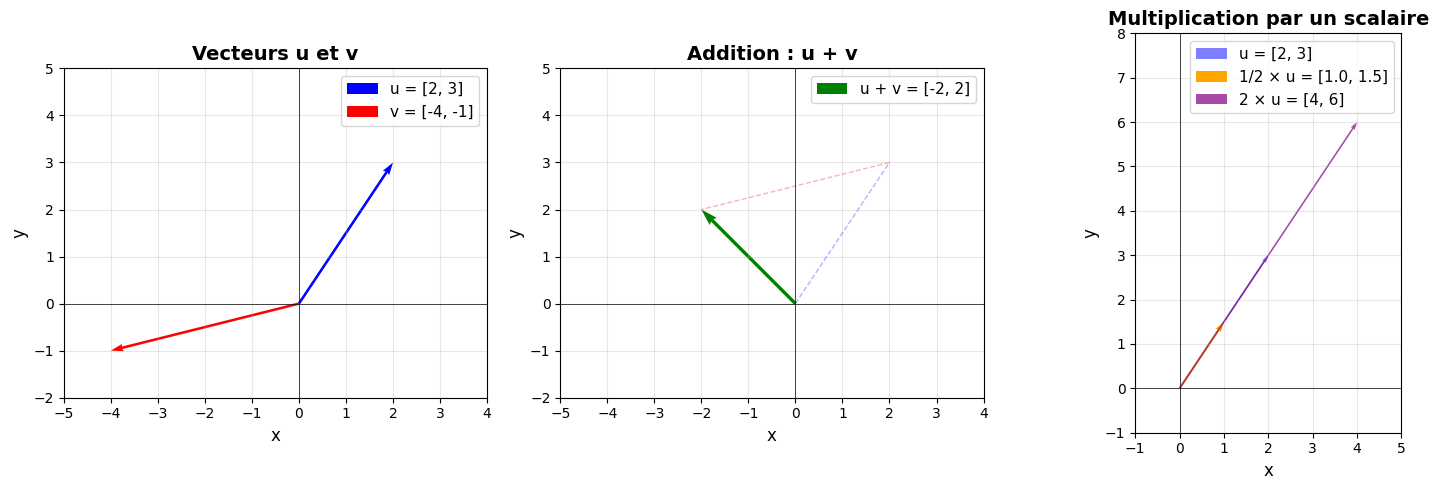

RÉSULTATS
u = [2 3]
v = [-4 -1]

u + v = [-2  2]
1/2 × u = [1.  1.5]
2 × u = [4 6]


In [14]:
#Exercice 4 : votre code ici

import numpy as np
import matplotlib.pyplot as plt

# Configuration de la figure
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Définir les vecteurs
u = np.array([2, 3])
v = np.array([-4, -1])

# ============================================
# Graphique 1 : Les vecteurs de base
# pour afficher une flèche utilisez la méthode ax.quiver()
# ============================================
ax1 = axes[0]

# Dessiner les vecteurs comme des flèches
ax1.quiver(0, 0, u[0], u[1], angles='xy', scale_units='xy', scale=1, 
           color='blue', width=0.006, label='u = [2, 3]')
ax1.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, 
           color='red', width=0.006, label='v = [-4, -1]')

# Configuration des axes
ax1.set_xlim(-5, 4)
ax1.set_ylim(-2, 5)
ax1.axhline(y=0, color='k', linewidth=0.5)
ax1.axvline(x=0, color='k', linewidth=0.5)
ax1.grid(True, alpha=0.3)
ax1.set_xlabel('x', fontsize=12)
ax1.set_ylabel('y', fontsize=12)
ax1.set_title('Vecteurs u et v', fontsize=14, fontweight='bold')
ax1.legend(fontsize=11)
ax1.set_aspect('equal')

# ============================================
# Graphique 2 : Addition de vecteurs
# ============================================
ax2 = axes[1]

# Dessiner u
#ax2.quiver(0, 0, u[0], u[1], angles='xy', scale_units='xy', scale=1, 
#           color='blue', width=0.006, alpha=0.5, label='u = [2, 3]')

# Dessiner v (déplacé à l'extrémité de u pour montrer l'addition)
#ax2.quiver(u[0], u[1], v[0], v[1], angles='xy', scale_units='xy', scale=1, 
#           color='red', width=0.006, alpha=0.5, label='v = [-4, -1]')

# Dessiner la somme u + v
somme = u + v
ax2.quiver(0, 0, somme[0], somme[1], angles='xy', scale_units='xy', scale=1, 
           color='green', width=0.008, label=f'u + v = [{somme[0]}, {somme[1]}]')

# Ligne pointillée pour montrer la construction
ax2.plot([0, u[0]], [0, u[1]], 'b--', alpha=0.3, linewidth=1)
ax2.plot([u[0], u[0]+v[0]], [u[1], u[1]+v[1]], 'r--', alpha=0.3, linewidth=1)

# Configuration des axes
ax2.set_xlim(-5, 4)
ax2.set_ylim(-2, 5)
ax2.axhline(y=0, color='k', linewidth=0.5)
ax2.axvline(x=0, color='k', linewidth=0.5)
ax2.grid(True, alpha=0.3)
ax2.set_xlabel('x', fontsize=12)
ax2.set_ylabel('y', fontsize=12)
ax2.set_title('Addition : u + v', fontsize=14, fontweight='bold')
ax2.legend(fontsize=11)
ax2.set_aspect('equal')

# ============================================
# Graphique 3 : Multiplication par un scalaire
# ============================================
ax3 = axes[2]

# Vecteur original u
ax3.quiver(0, 0, u[0], u[1], angles='xy', scale_units='xy', scale=1, 
           color='blue', width=0.006, alpha=0.5, label='u = [2, 3]')

# Multiplication par 0.5
u_demi = 1/2 * u
ax3.quiver(0, 0, u_demi[0], u_demi[1], angles='xy', scale_units='xy', scale=1, 
           color='orange', width=0.008, label=f'1/2 × u = [{u_demi[0]}, {u_demi[1]}]')

# Multiplication par 2
u_double = 2 * u
ax3.quiver(0, 0, u_double[0], u_double[1], angles='xy', scale_units='xy', scale=1, 
           color='purple', width=0.006, alpha=0.7, label=f'2 × u = [{u_double[0]}, {u_double[1]}]')

# Configuration des axes
ax3.set_xlim(-1, 5)
ax3.set_ylim(-1, 8)
ax3.axhline(y=0, color='k', linewidth=0.5)
ax3.axvline(x=0, color='k', linewidth=0.5)
ax3.grid(True, alpha=0.3)
ax3.set_xlabel('x', fontsize=12)
ax3.set_ylabel('y', fontsize=12)
ax3.set_title('Multiplication par un scalaire', fontsize=14, fontweight='bold')
ax3.legend(fontsize=11)
ax3.set_aspect('equal')

plt.tight_layout()
plt.show()

# Afficher les résultats numériques
print("="*50)
print("RÉSULTATS")
print("="*50)
print(f"u = {u}")
print(f"v = {v}")
print(f"\nu + v = {somme}")
print(f"1/2 × u = {u_demi}")
print(f"2 × u = {u_double}")

### Espace vectoriel $\mathbb{R}^n$

L’**espace vectoriel** $\mathbb{R}^n$ est l’ensemble de tous les vecteurs à n dimensions (n nombres réels).

Exemples d’espaces vectoriels de différentes dimensions :

- $\mathbb{R}^2$ : plan 2D (ex: coordonnées GPS [latitude, longitude])
- $\mathbb{R}^3$ : espace 3D (ex: position dans une pièce [x, y, z])
- $\mathbb{R}^n$ : espace à n dimensions (ex: dataset avec n caractéristiques)

Dans un dataset, chaque ligne (observation) est un point dans ℝⁿ où n est le nombre de colonnes (features).

Exemple : Un dataset de maisons avec 5 colonnes (surface, nb chambres, année, prix, quartier_id)  
→ Chaque maison est un point dans $\mathbb{R}^5$

## Mesurer distances et similarité

Vu que nous manipulons des éléments appartenant à un espace, pouvoir calculer des distances dans cet espace va être très importants dans nos analyses. Il permettra de définir combien deux élements sont « proches » ou « similaires » dans un espace données (celui de nos observations ou *features*).

### La norme (longueur d'un vecteur)

La **norme** d'un vecteur mesure sa "longueur" : elle est au vecteur ce que la valeur absolue est aux nombres. La **norme euclidienne** (ou norme L2) est la plus courante :

$$\|v\| = \sqrt{v_1^2 + v_2^2 + ... + v_n^2}$$

C'est une généralisation du **théorème de Pythagore** en n dimensions !

Exemple :

Soit `v = [3, 4]`

$$\|v\| = \sqrt{3^2 + 4^2} = \sqrt{9 + 16} = \sqrt{25} = 5$$

**Interprétation géométrique** : nous venons de calculer la distance du point (3, 4) à l'origine (0, 0)

#### Exercice 5 : Implémentez ce calcul de la norme. 
Dans la doc de numpy, cherchez le module `linalg`. Vous y trouverez peut-être une méthode qui pourra vous aider… (comparez avec un calcul « à la main »).

In [15]:
# Exercice 5 : votre code ici

v = np.array([3, 4])
norme = np.linalg.norm(v)
print("v =", v)
print("Norme de v :", norme)

# Calcul manuel pour vérifier
norme_manuelle = np.sqrt(3**2 + 4**2)
print("Norme (calcul manuel) :", norme_manuelle)

v = [3 4]
Norme de v : 5.0
Norme (calcul manuel) : 5.0


#### Autres normes courantes

La norme peut être définie de diverses manières du moment que la définition respecte les conditions qui en font une norme. 

- **Norme L1 (Manhattan)** : $\|v\|_1 = |v_1| + |v_2| + ... + |v_n|$ -> déplacement « en ligne droite » (comme les rue de Manhattan)
- **Norme L∞ (maximum)** : $\|v\|_\infty = \max(|v_1|, |v_2|, ..., |v_n|)$ -> distance de [Tchebychev](https://fr.wikipedia.org/wiki/Pafnouti_Tchebychev). Importante pour les automates cellulaires ou les réseaux.

Le choix d’une norme peut dépendre de contraintes de différentes natures : facilité de calcul (une somme de carrés demande plus de calcul qu’une comparaison de valeurs absolues), tolérances aux erreurs ou approximations, géométrie de l’espace (sur un échiquier L1 ou l∞ sont très adaptées).

Généralement nous choisirons L2.

#### Distance entre des vecteurs

Nous avons vu la norme d’un vecteur : sa longueur, c’est à dire la distance entre l’extrémité et l’origine (si on le visualise comme une flèche). 

Revenons aux points (dans un espace à n dimensions), répérés par leur coordonnées. Si nous voulons connaître la *distance* entre ces points, on va, de la même manière utiliser le théorème de Pythagore « généralisé » qu’on va appeler ici la **distance euclidienne** entre deux points a et b mesure la longueur du segment qui les relie :

$$d(u, v) = \|a - b\| = \sqrt{\sum_i (a_i - b_i)^2}$$

#### Propriétés importantes d’une norme/distance

- **Positivité** : $d(x, y) \geq 0$, et $d(x, y) = 0$ ssi $x = y$
- **Symétrie** : $d(x, y) = d(y, x)$
- **Inégalité triangulaire** : $d(x, z) \leq d(x, y) + d(y, z)$
- une norme doit être invariante par translation et compatible avec la mise à l’échelle (multiplication)

Application : Distance entre clients

Considérons trois clients caractérisés par les features `[âge, revenu/1000, nb_achats]` :

```python
client_A = [25, 2.5, 10]
client_B = [30, 3.0, 15]
client_C = [60, 4.0, 20]
```

Distance : 

$$
d_AB = \sqrt{(25-30)^2 + (2.5-3.0)^2 + (10-15)^2} = \sqrt{25 + 0.25 + 25} ≈ 7.09 \\
d_AC = \sqrt{(25-60)^2 + (2.5-4.0)^2 + (10-20)^2} = \sqrt{1225 + 2.25 + 100} ≈ 36.43
$$

Plus la distance est faible, plus les clients sont similaires !


#### Exercice 6a : Implémentez ces calculs de distances

In [ ]:
# Exercice 6a : votre code ici

client_A = np.array([25, 2.5, 10])
client_B = np.array([30, 3.0, 15])
client_C = np.array([60, 4.0, 20])

# Méthode 1 : Avec np.linalg.norm
distanceAB = np.linalg.norm(client_A - client_B)
distanceAC = np.linalg.norm(client_A - client_C)
print("Client A :", client_A)
print("Client B :", client_B)
prinnt("Client C:", client_C)
print(f"Distance entre clients A et B: {distance_AB:.2f}")
print(f"Distance entre clients A et C: {distance_AC:.2f}")

# Méthode 2 : Calcul direct
distance_AB2 = np.sqrt(np.sum((client_A - client_B)**2))
distance_AC2 = np.sqrt(np.sum((client_A - client_C)**2))
print(f"Distance entre clients A et B (méthode directe) : {distance_AB2:.2f}")
print(f"Distance entre clients A et c (méthode directe) : {distance_AC2:.2f}")

#### Exercice 6b : 

Calculez la distance euclidienne entre :
- a) `A = [1, 2]` et `B = [4, 6]`
- b) `C = [0, 0, 0]` et `D = [1, 1, 1]`
- c) Parmi les points `P1 = [1, 1]`, `P2 = [2, 3]`, `P3 = [5, 1]`, lequel est le plus proche de P1 ?

In [17]:
# Exercice 6b : Votre code ici

# a) Distance entre A et B
A = np.array([1, 2])
B = np.array([4, 6])
d_AB = np.linalg.norm(A - B)
print(f"a) d(A,B) = {d_AB}")
print(f"   √[(1-4)² + (2-6)²] = √[9 + 16] = √25 = 5")

# b) Distance entre C et D
C = np.array([0, 0, 0])
D = np.array([1, 1, 1])
d_CD = np.linalg.norm(C - D)
print(f"\nb) d(C,D) = {d_CD:.3f}")
print(f"   √[(0-1)² + (0-1)² + (0-1)²] = √3 ≈ 1.732")

# c) Quel point est le plus proche ?
P1 = np.array([1, 1])
P2 = np.array([2, 3])
P3 = np.array([5, 1])

d_P1P2 = np.linalg.norm(P1 - P2)
d_P1P3 = np.linalg.norm(P1 - P3)

print(f"\nc) d(P1,P2) = {d_P1P2:.3f}")
print(f"   d(P1,P3) = {d_P1P3:.3f}")
print(f"   P2 est le plus proche de P1")

a) d(A,B) = 5.0
   √[(1-4)² + (2-6)²] = √[9 + 16] = √25 = 5

b) d(C,D) = 1.732
   √[(0-1)² + (0-1)² + (0-1)²] = √3 ≈ 1.732

c) d(P₁,P₂) = 2.236
   d(P₁,P₃) = 4.000
   → P₂ est le plus proche de P₁


### Produit scalaire

Nous avons passé sous silence ce qu’il pouvait advenir d’une opération entre deux vecteurs : la multiplication. Nous avons affirmé que la multiplication entre deux vecteurs (au sens usuel) n’existait pas et que l’on ne pouvait que multiplier un 

En fait on peut définir une opération de multiplication entre deux vecteurs, simplement son résultat ne sera pas un vecteur, mais un scalaire.

C’est pour cela que l’on parle de **produit scalaire** (dot product en anglais) entre deux vecteurs, définit ainsi pour deux vecteurs u et v:

$$\langle u, v \rangle = u_1v_1 + u_2v_2 + ... + u_nv_n$$

On voit bien que cette formule débouche sur le calcul d’un nombre unique (un scalaire), car il s’agit d’une somme de produits.

Mais qui dit somme de produit, dit qu’il y a peut être un lien avec la norme, qui est aussi une somme de produits (racine d’une somme de carré plus exactement). Si l’on calcule le produit scalaire d’un vecteur avec lui-même, on obtient bien une somme de carré qui correspond à la norme. En fait, la notion de produit scalaire est essentielle en géométrie euclidienne (dans sa forme moderne), elle permet de définir des espaces euclidiens.

$$\|v\|^2 = \langle v, v \rangle$$

#### Interprétation géométrique

En fait, un produit scalaire entre *u* et *v* est le produit de la norme du vecteur *u* avec la norme de la projection du vecteur *v* sur *u* (note : le produit scalaire est commutatif). On peut donc l’exprimer en fonction des normes et du cosinus de l’angle entre les deux vecteurs :

$$\langle u, v \rangle = \|u\| \cdot \|v\| \cdot \cos(\varphi)$$

où φ est l'angle entre u et v.

Rappel de trigonométrie si besoin (faites un petit dessin si la raison de la présence d’un cosinus ne vous saute pas aux yeux) :

![définitions trigonométrie](./images/DefinitionTrigo.png)

En ce qui concerne notre problématique de calculer des similarités entre vecteurs :

- un produit scalaire **« élevé »** → les vecteurs pointent dans la **même direction** (cos φ = 1)
- un produit scalaire **« petit ou négatif »** → les vecteurs pointent dans des **directions différentes** (voire opposées si négatif avec une grande valeur absolue)
- un produit scalaire = **0** → les vecteurs sont **orthogonaux** (perpendiculaires, ils ne partagent aucune dimension)

#### Exercice 7 : implémentez le calcul du produit scalaire

- a) Soit `u = [1, 2, 3]` et `v = [4, 5, 6]`, calculez le produit scalaire entre u et v (cherchez dans la doc de numpy)
- b) Calculez `⟨[1, 0], [0, 1]⟩`
- c) Calculez `⟨[3, 4], [3, 4]⟩` et comparez avec `‖[3, 4]‖²`
- d) Deux vecteurs u et v ont un produit scalaire de 0. Que peut-on dire de leur angle φ ?

In [18]:
# Exercice 7 : votre code

# a) produit scalaire entre u et v

u = np.array([1, 2, 3])
v = np.array([4, 5, 6])

produit = np.dot(u, v)
print("u =", u)
print("v =", v)
print("⟨u, v⟩ =", produit)
print("Calcul : 1×4 + 2×5 + 3×6 = 4 + 10 + 18 = 32")

# b) Produit scalaire de vecteurs orthogonaux
u1 = np.array([1, 0])
v1 = np.array([0, 1])
prod_a = np.dot(u1, v1)
print(f"a) ⟨[1, 0], [0, 1]⟩ = {prod_a}")
print("   → Ces vecteurs sont orthogonaux (perpendiculaires)\n")

# c) Produit scalaire d’un vecteur avec lui-même
u2 = np.array([3, 4])
prod_b = np.dot(u2, u2)
norme_carree = np.linalg.norm(u2)**2
print(f"b) ⟨[3, 4], [3, 4]⟩ = {prod_b}")
print(f"   ‖[3, 4]‖² = {norme_carree}")
print(f"   → Confirmation : ⟨v, v⟩ = ‖v‖²\n")

# d) Interprétation géométrique
print("c) Si ⟨u, v⟩ = 0, alors cos(θ) = 0, donc φ = 90°")
print("   → Les vecteurs sont perpendiculaires")

u = [1 2 3]
v = [4 5 6]
⟨u, v⟩ = 32
Calcul : 1×4 + 2×5 + 3×6 = 4 + 10 + 18 = 32
a) ⟨[1, 0], [0, 1]⟩ = 0
   → Ces vecteurs sont orthogonaux (perpendiculaires)

b) ⟨[3, 4], [3, 4]⟩ = 25
   ‖[3, 4]‖² = 25.0
   → Confirmation : ⟨v, v⟩ = ‖v‖²

c) Si ⟨u, v⟩ = 0, alors cos(θ) = 0, donc φ = 90°
   → Les vecteurs sont perpendiculaires


## Combinaisons linéaires et barycentres

### Combinaison linéaire

Une **combinaison linéaire** de vecteurs $v_1, v_2, ..., v_k$ est :

$$w = \alpha_1v_1 + \alpha_2v_2 + ... + \alpha_kv_k$$

où $\alpha_1, \alpha_2, ..., \alpha_k$ sont des scalaires, en général des nombres réels (coefficients).

Si vous avez déjà vu été familiarisé avec des régressions par exemple, vous aurez reconnu cette formule.

### Exemple : Mélange de couleurs

Pour afficher les couleurs sur vos écrans, on utilise la **synthèse additive** dont le principe repose sur le mélagne de trois lumières de couleurs de bases :

![Illustration synthèse additive](./images/SynthAdd.jpg)

Ces trois couleurs étant le rouge, le vert et le bleu, on parle de RVB (en français) ou RGB (en anglais). Toutes les couleurs sont représentées par des vecteurs en 3 dimensions ou chaque dimension correspond à une couleur [Rouge, Vert, Bleu].

La valeur de chaque composante indique la quantité de couleur correspondante :

```python
rouge_pur = [255, 0, 0]
bleu_pur = [0, 0, 255]
```

On pourrait indiquer ces quantité en pourcentage (valeur max = 1, min = 0). Cette quantité est généralement codée sur un octet (256 valeurs possibles de 0 à 255), que l’on peut normaliser (en divisant par 255) pour revenir sur un intervalle [0, 1]. 255 valeurs possibles est-ce assez ? Cela permet déjà d’encoder 256<sup>3</sup> = 16 777 216 couleurs, ce qui est largement satisfaisant pour un œil humain.

Ainsi, une couleur violette peut être obtenue par combinaison :

```
violet = 0.5 × rouge_pur + 0.5 × bleu_pur = [127.5, 0, 127.5]
```
#### Exercice 8 : coder une grille RGB

Avec matplotlib et numpy, créez une image en deux dimensions montrant les couleurs que l’on peut obtenir en faisant varier les composantes rouges et bleues, et en fixant la composante verte à une valeur précise, 0.5 par exemple.
Pourquoi ne peut-on représenter la variation de toutes les couleurs simultanément ?

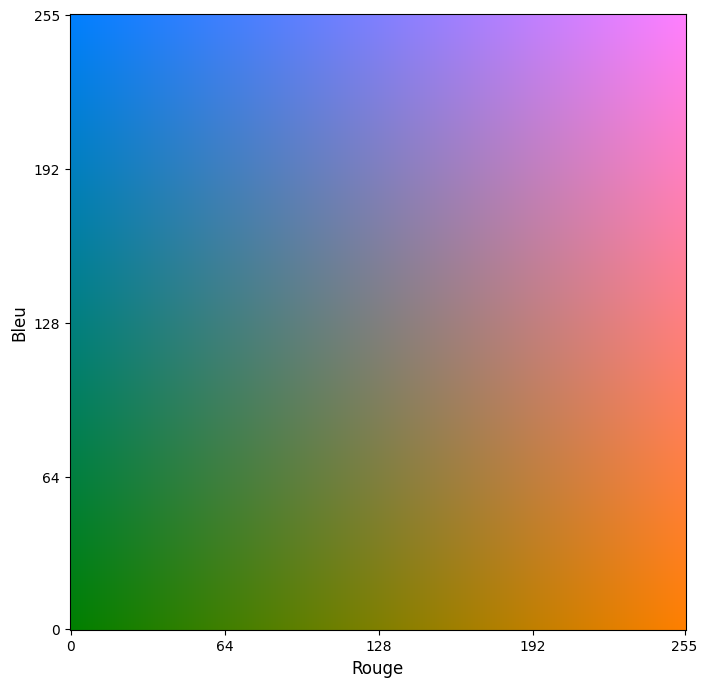

In [20]:
# Exercice 8 : votre code

import numpy as np
import matplotlib.pyplot as plt

# Créer une matrice 256x256 qui contiendra tous nos points pour une couleur donnée. 
# ATTENTION pour une image il y a 3 matrices, une par couleur, 
# réfléchissez bien aux dimension de l’array que vous devez créer. 
# Ce sera notre image.
image = np.zeros((256, 256, 3))

# fixer la valeur de la couleur verte, par exemple 0.5
vert = 0.5

# Remplir l'image avec les combinaisons RGB (axe y = bleu de 0 à 255, axe x = rouge de 0 à 255, ne pas oublier de normaliser)
for rouge in range(256):
    for bleu in range(256):
        image[255-bleu, rouge] = [rouge/255, 0.5, bleu/255]

# Afficher l'image
plt.figure(figsize=(8, 8))
plt.imshow(image)
plt.xlabel('Rouge', fontsize=12)
plt.ylabel('Bleu', fontsize=12)
plt.xticks([0, 64, 128, 192, 255])
plt.yticks([0, 64, 128, 192, 255], [255, 192, 128, 64, 0])
plt.show()

#### Exercice 9 : Combinaisons linéaires

Soit `v1 = [1, 0]` et `v2 = [0, 1]`

- a) Calculez `w = 2v1 + 3v2`
- b) Pouvez-vous obtenir le vecteur `[5, -2]` comme combinaison linéaire de v1 et v2 ?
- c) Quel vecteur obtenez-vous avec `0.5v1 + 0.5v2` ?

Si vous souhaitez représenter tout ça graphiquement, vous pouvez reprendre le code matplotlib de l’exercice 4 (mais ce n’est pas obligé)

In [21]:
# Exercice 9 : votre code

v1 = np.array([1, 0])
v2 = np.array([0, 1])

# a) 2v1 + 3v2
w_a = 2*v1 + 3*v2
print("a) w = 2v1 + 3v2 =", w_a)
print("   2[1, 0] + 3[0, 1] = [2, 0] + [0, 3] = [2, 3]\n")

# b) [5, -2] comme combinaison de v₁ et v₂
w_b = 5*v1 + (-2)*v2
print("b) [5, -2] = 5v1 + (-2)v2")
print("   Vérification :", w_b, "\n")

# c) Point milieu
w_c = 0.5*v1 + 0.5*v2
print("c) 0.5v1 + 0.5v2 =", w_c)
print("   C'est le point du milieu entre v1 et v2 !")

a) w = 2v1 + 3v2 = [2 3]
   2[1, 0] + 3[0, 1] = [2, 0] + [0, 3] = [2, 3]

b) [5, -2] = 5v1 + (-2)v2
   Vérification : [ 5 -2] ✓

c) 0.5v1 + 0.5v2 = [0.5 0.5]
   C'est le point du milieu entre v1 et v2 !


En fait, dans cet exercice, v1 et v2 sont ce que l’on appelle les **vecteurs unités** du plan (ou de $\mathbb{R}^2$) : on peut exprmier tous les vecteurs du plan comme combinaison linéaire de ces deux vecteurs. Ils forment la **base** vectorielle du plan (et même ici, ce que l’on appelle la **base canonique**). Les vecteurs de la base sont linéairement indépendants (on parle aussi de famille libre). 

Des vecteurs sont linéairement indépendant si la seule manière d’obtenir une combinaison linéaire nulle de ces vecteurs est de mettre tous les coefficients (scalaires) à 0 :

$$
\forall (a_{1},\ldots ,a_{n})\in K^{n},\quad \left(a_{1}v_{1}+\cdots +a_{n}v_{n}=0_{E}\implies a_{1}=a_{2}=\cdots =a_{n}=0_{K}\right)
$$

Note : $K$ est le corps des scalaires lié à l’espace vectoriel

### Centroïde

On parle aussi de moyenne des vecteurs ou barycentre.

Le **centroïde** d'un ensemble de points $x_1, x_2, ..., x_n$ est leur moyenne :

$$\mu = \frac{1}{n} \sum_i x_i = \frac{x_1 + x_2 + ... + x_n}{n}$$

C'est une combinaison linéaire avec des coefficients égaux : $(1/n, 1/n, ..., 1/n)$

Exemple : centroïde de clients

Trois clients avec profils `[âge, revenu/1000]` :

```python
client1 = [25, 2.0]
client2 = [35, 3.5]
client3 = [30, 2.5]
```

Centroïde : $\mu = \frac{1}{3} \times ([25, 2.0] + [35, 3.5] + [30, 2.5]) = [30, 2.67]$

Le centroïde représente en quelque sorte le **"client moyen"**

#### Exercice 10 : Calculer le centroïde d'un ensemble de points

Considérant les clients ci-dessus, implémentez un calcul du centroïde :

In [22]:
# Exercice 10 : votre code

clients = np.array([
    [25, 2.0],
    [35, 3.5],
    [30, 2.5]
])

# Méthode 1 : Avec np.mean
centroid = np.mean(clients, axis=0)
print("Clients :")
print(clients)
print("\nCentroïde (client moyen) :", centroid)

# Méthode 2 : Calcul manuel
centroid_manual = np.sum(clients, axis=0) / len(clients)
print("Centroïde (calcul manuel) :", centroid_manual)

Clients :
[[25.   2. ]
 [35.   3.5]
 [30.   2.5]]

Centroïde (client moyen) : [30.          2.66666667]
Centroïde (calcul manuel) : [30.          2.66666667]


#### Propriété fondamentale du centroïde

Théorème important : Le centroïde μ **minimise la somme des distances au carré** :

$$\mu = \arg\min_c \sum_i \|x_i - c\|^2$$

En d'autres termes : **le centroïde est le point qui est en moyenne le plus proche de tous les points** !

On appelle aussi « inertie » cette somme des distances au carré.

Cette propriété est au cœur de l'algorithme K-means.

On ne va pas démontrer cette propriété formellement, mais l’exercice suivant devrait vous en donner l’intuition.

#### Exercice 11 : le centroïde minimise la somme des distances au carré

-créez un ensemble de vecteurs, par exemple `[0, 0], [2, 0], [0, 2], [2, 2]` (ou d’autres vecteurs de votre choix, ou générés aléatoirement)
-créez une fonction qui calcule l’inertie entre un vecteur et tous les autres vecteurs
-calculez le centroïde des vecteurs
-créez une liste de candidats alternatifs au centroïde qu’on appelera « autres centres » (à la main : par exemple dans notre exemple `[0.5, 0.5], [1.5, 1.5], [0, 0]` etc., vous pouvez aussi les générer aléatoirement dans un domaine limité)
-calculer l’inertie pour tout ces candidats et le centroïde
-constatez que c’est le centroïde qui génère la somme de carré la plus faible
-si vous n’êtes pas convaincu-e : augmentez le nombre de points, le nombre de candidats, faites une représentation graphique avec matplotlib, etc.


In [24]:
# Exercice 11 : votre code

vectors = np.array([
    [0, 0],
    [2, 0],
    [0, 2],
    [2, 2]
])

# Centroïde
centroid = np.mean(vectors, axis=0)

# Calculer la somme des distances au carré pour un centre donné
def compute_inertia(vectors, center):
    return np.sum(np.linalg.norm(vectors - center, axis=1)**2)

inertia_centroid = compute_inertia(vectors, centroid)
print(f"Centroïde : {centroid}")
print(f"Inertie au centroïde : {inertia_centroid:.3f}")

# Tester d'autres points
other_centers = np.array([
    [0.5, 0.5],
    [1.5, 1.5],
    [0, 0]
])

print("\nComparaison avec d'autres centres :")
for center in other_centers:
    inertia = compute_inertia(vectors, center)
    print(f"Centre {center} → Inertie : {inertia:.3f}")

print(f"\n Le centroïde {centroid} donne la plus petite inertie !")

Centroïde : [1. 1.]
Inertie au centroïde : 8.000

Comparaison avec d'autres centres :
Centre [0.5 0.5] → Inertie : 10.000
Centre [1.5 1.5] → Inertie : 10.000
Centre [0. 0.] → Inertie : 16.000

 Le centroïde [1. 1.] donne la plus petite inertie !


### Combinaison convexe

La notion de convexité est importante en analyse, et a bien des conséquences pratiques.

Une combinaison convexe est une combinaison linéaire où :

-Tous les coefficients sont positifs ou nuls :  $\alpha_i \ge 0$

-Les coefficients somment à 1 : $\sum_{i}\alpha_i=1$

Cela implique que la combinaison linéaire tombe à l’intérieur d’un polygone dont les vecteurs sont les sommets :

![Schéma Combinaison linéaire convexe](./images/CombinaisonConvexe.png)
 
Le centroïde est un cas particulier de combinaison convexe, avec tous les coefficients égaux.

#### Lien avec le clustering (K-means)

Dans l'algorithme K-means, les centroïdes des clusters sont toujours des combinaisons convexes des points des clusters.

Cette propriété garantit que le centroïde restent "au milieu" des points du cluster.

## Variance et inertie

### Variance d'un ensemble de points

Si vous avez déja eu un cours de statistique, la **variance** devrait vous être une notion familière. Elle mesure la dispersion des vecteurs autour de leur centroïde :

$$\text{Var} = \frac{1}{n} \sum_i \|x_i - \mu\|^2$$

où μ est le centroïde de l'ensemble des vecteurs.

Exemple :

Vecteurs : `[0, 0]`, `[1, 0]`, `[0, 1]`, `[1, 1]`  
Centroïde : `μ = [0.5, 0.5]`

Variance = moyenne des distances au carré = 0.5

#### Exercice : calcul de variance

Implémentez un calcul la variance pour les vecteurs ci-dessus :

In [25]:
# Exercice 12 : votre code

points = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])

# Calculer le centroïde
centroid = np.mean(points, axis=0)
print("Points :")
print(points)
print("\nCentroïde :", centroid)

# Calculer les distances au carré
distances_sq = np.sum((points - centroid)**2, axis=1)
print("\nDistances au carré :")
for i, d2 in enumerate(distances_sq):
    print(f"  Point {i} : {d2}")

# Variance
variance = np.mean(distances_sq)
print(f"\nVariance : {variance}")

Points :
[[0 0]
 [1 0]
 [0 1]
 [1 1]]

Centroïde : [0.5 0.5]

Distances au carré :
  Point 0 : 0.5
  Point 1 : 0.5
  Point 2 : 0.5
  Point 3 : 0.5

Variance : 0.5


### Inertie et somme de carrés intra

Lorsque l’on cherche à faire du clustering, on va regrouper les éléments (vecteurs) de notre dataset en groupes (clusters) d’éléments similaires.
On peut calculer une variance pour l’ensemble de nos données, mais on pourrait aussi bien calculer la variance à l’intérieur de sous-groupes d’éléments.

Nous avons vu précédemment qu’on parle d’inertie pour la somme de carré des distances au centroïde. C’est parce qu’on peut faire une analogie avec la mécanique : plus un nuage de points à d’élément plus il est « lourd » et son centre de gravité (le centroïde) sera « difficile » à bouger. C’est-à-dire que plus il y a de points, moins l’ajout d’un point aura d’impact sur la position du centroïde (le centre de gravité).

Alors que pour la variance, indicateur de dispersion, le nombre d’observation a un impact limité (il est conçu pour pouvoir comparer des variances entre groupes avec des effectifs différents - attention on parle seulement du point de vue de la manière dont la statistique est construite) l'**inertie** est sensible au nombre d’observations. Variances et inerties sont liées par le fait que simplement inertie = nombre d’observation × variance

Le problème que nous nous posons (clustering) consiste à identifier des groupes au sein desquels l’inertie des valeurs observées par rapport au barycentre du groupe est minimale, c’est la méthode des **k-means**.

Si on considère  cas où les points sont divisés en plusieurs groupes (clusters) :

$$\text{Inertie} = \sum_k \sum_{i \in C_k} \|x_i - \mu_k\|^2$$

où :
- $C_k$ est le k-ième cluster
- $\mu_k$ est le centroïde du cluster k
- On somme les distances au carré de chaque point à son centroïde de cluster

![Illustration inertie intra](./images/InertieIntra.png)

L'inertie totale (somme non pondérée des inerties des clusters séparés, à droite sur l’illustration) sera inférieure à l'inertie globale (inertie du tout fusionné en un seul cluster, à gauche sur l’illustration). Pourquoi ? Parce que, quand en séparant les vecteurs en deux clusters, chacun aura son propre centroïde, et chaque vecteur sera plus proche de son propre centroïde que du centroïde global de l'ensemble des vecteurs.

#### Exercice 13 : calcul d’inertie

Vecteurs : `[0, 0]`, `[1, 1]`, `[2, 1]`, `[10, 5]`, `[11, 4]`  
Clusters : C<sub>1</sub> = {`[0, 0]`, `[1, 1]`, `[2,1]`} et C<sub>2</sub> = {`[10, 5]`, `[11, 4]`}

- a) Calculez les centroïdes μ<sub>1</sub> et μ<sub>2</sub>
- b) Calculez l'inertie de chaque cluster
- c) Calculez l'inertie totale
- d) Fusionnez les clusters et calculez l’inertie globale
- e) Concluez

In [29]:
# Exercice 13 : votre code 

# Définir les clusters
C1 = np.array([[0, 0], [1, 1], [2, 1]])
C2 = np.array([[10, 5], [11, 4]])

# a) Calculer les centroïdes
mu1 = np.mean(C1, axis=0)
mu2 = np.mean(C2, axis=0)
print("a) μ1 =", mu1)
print("   μ2 =", mu2)

# b) Calculer l'inertie de chaque cluster
inertie_C1 = np.sum(np.linalg.norm(C1 - mu1, axis=1)**2)
inertie_C2 = np.sum(np.linalg.norm(C2 - mu2, axis=1)**2)
print(f"\nb) Inertie C1 : {inertie_C1:.3f}")
print(f"   Inertie C1 : {inertie_C2:.3f}")

# c) Inertie totale (avec 2 clusters séparés)
inertie_totale = inertie_C1 + inertie_C2
print(f"\nc) Inertie totale (2 clusters) : {inertie_totale:.3f}")

# d) Inertie si on fusionne les clusters
print("\n" + "="*50)
print("COMPARAISON : Fusion des clusters")
print("="*50)

# Fusionner tous les points
tous_points = np.vstack([C1, C2])
print("\nTous les points fusionnés :")
print(tous_points)

# Calculer le centroïde global
mu_global = np.mean(tous_points, axis=0)
print("\nCentroïde global :", mu_global)

# Calculer l'inertie globale (1 seul cluster)
inertie_globale = np.sum(np.linalg.norm(tous_points - mu_global, axis=1)**2)
print(f"Inertie globale (1 cluster) : {inertie_globale:.3f}")

print(f"\n💡 Observation :")
print(f"   Inertie avec 2 clusters : {inertie_totale:.3f}")
print(f"   Inertie avec 1 cluster  : {inertie_globale:.3f}")
print(f"   → Séparer en clusters réduit l'inertie de {inertie_globale - inertie_totale:.3f} !")

a) μ₁ = [1.         0.66666667]
   μ₂ = [10.5  4.5]

b) Inertie C₁ : 2.667
   Inertie C₂ : 1.000

c) Inertie totale (2 clusters) : 3.667

COMPARAISON : Fusion des clusters

Tous les points fusionnés :
[[ 0  0]
 [ 1  1]
 [ 2  1]
 [10  5]
 [11  4]]

Centroïde global : [4.8 2.2]
Inertie globale (1 cluster) : 129.600

💡 Observation :
   Inertie avec 2 clusters : 3.667
   Inertie avec 1 cluster  : 129.600
   → Séparer en clusters réduit l'inertie de 125.933 !


## Application : Clustering avec k-means

k-means(ou k-moyennes en français) est un algorithme de clustering, une opération qui consiste à regrouper les données ou observations (vecteurs) en sous-groupes (clusters) les plus homogènes possibles. L’algorithme k-mean crée, comme son nom l’indique, regroupe les données en *k* clusters. Il est facile à comprendre et à implémenter (c’est pour quoi nous l’avons choisi comme objet de ce cours). Il est peu gourmand en ressources de calcul et converge assez rapidement (c’est un algorithme itératif).  

Le clustering peut avoir différentes applications :

- Analyse de données (explorer structure des données)
- Détection d'anomalies (points isolés)
- Recommandations (grouper utilisateurs similaires)
- Segmentation de clients (marketing)
- Et même, en dehors du champ de la data science, la compression d'images (réduire le nombre de couleurs p. ex.)

### Un petit récapitulatif du chemin parcouru et mise en forme du problème :

Nous avons exploré différents concept mathématiques en algèbre linéaire, qui vont nous permettre d’implémenter un algorithme de clustering :

- **Vecteurs et espace vectoriel ℝ<sup>n</sup>** -> Représentation des données comme vecteur à n dimensions
- **Norme et distance euclidienne** -> Mesurer la proximité / similarité entre des vecteurs
- **Centroïde et combinaison convexe** -> Point moyen ou centre de d'un ensemble de vecteurs (cluster)
- **Inertie et variance** -> À quel point les clusters sont « compacts »

Nous venons de voir dans la section précédente sur l’inertie que la séparation des vecteurs en clusters diminuait précisément cette inertie.
L'algorithme K-means cherche à **minimiser l'inertie intra-cluster**.

Minimiser l'inertie = créer des clusters compacts où les points sont proches de leurs centroïdes respectifs.

Formellement le problème se pose ainsi : partitionner n points en k clusters pour minimiser

$$J = \sum_k \sum_{i \in C_k} \|x_i - \mu_k\|^2$$

### L’algorithme k-means

Cet algorithme demande de prédéfinir à l’avance le nombre de clusters que l’on désire pour regrouper les données.

1. l’utilisateur choisit donc le nombre k de clusters souhaité (nous verrons plus bas qu’il y a une méthode pour choisir ce nombre autrement qu’au pif)
2. l’algorithme va choisir k vecteurs aléatoirement (candidats) parmi la totalité des vecteurs constituant les données
3. on calcule pour tous les vecteurs restant la distance aux candidats, et on les affecte au candidat le plus proche pour constituer un cluster
4. on calcule ensuite le centroïdes de chacun de ces clusters ainsi consitutés (on remplace les candidats)
5. on recommence : on ré-affecte les individus au nouveau centre le plus proche
6. on répète les deux étapes précédentes jusqu’à ce que les centroïdes restent stables

Des illustrations pour bien visualiser la procédure :

![Algo K-Means 1](./images/KMeans1.png)
![Algo K-Means 2](./images/KMeans2.png)

### Exercice 14 : implémenter k-means

1. Commencer par créer des données groupées. Deux choix :
   * soit vous utilisez la méthode `make_blobs` du module sklearn.datasets,
   * soit vous générez des listes de valeurs aléatoires avec `random` à partir d’une distribution (normale par exemple), avec des valeurs centrales et dispertions différentes (3 listes pour 3 clusters, et n’oubliez pas qu’il vous faut une dimension x et une dimension y en 2D). Ensuite assembler les coordonnées de manière à avoir une liste de vecteurs [[x0, y0], [x1, y1],…])




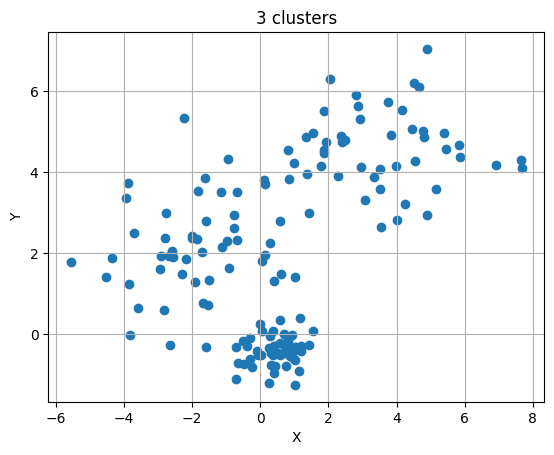

In [45]:
# Exercice 14 partie 1 : votre code

import random
random.seed(42)

# on génére les coordonnées à partir d’une distribution normale

X0 = [random.gauss(0.5, 0.8) for i in range(0, 50)]
X1 = [random.gauss(3, 2) for i in range(0, 50)]
X2 = [random.gauss(-2, 1.5) for i in range(0, 50)]
Y0 = [random.gauss(-0.5, 0.4) for i in range(0, 50)]
Y1 = [random.gauss(4.5, 0.8) for i in range(0, 50)]
Y2 = [random.gauss(2, 1) for i in range(0, 50)]

# on crée 
X = X0 + X1 + X2
Y = Y0 + Y1 + Y2

# on crée la liste de vectgeurs. Indice : utiliser zip()
vectors = [np.array([x, y]) for x, y in zip(X, Y)]


# Affichage avec scatter pour vérifier que tout est bon

X_coords = [v[0] for v in vectors]
Y_coords = [v[1] for v in vectors]

plt.scatter(X_coords, Y_coords)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('3 clusters')
plt.grid(True)
plt.show()

### Exercice 14 partie 2 : implémenter k-means

Ci-dessous du code à trou (à compléter par vos soins) pour implémenter une classe KMeans. Elle dispose des méthodes `.fit()` et `.predict()` sur le modèle de la plupart des classes en machine learning. `.fit()` va recevoir les données en entrée et réaliser le clustering (apprentissage des données d’entraînement), ̀`.predict()` servira à déterminer à quel cluster affecter une nouvelle observation (prédiction).

Si le côté « à trou » vous dérange (par exemple vous ne comprenez pas la logique du code ou vous êtes perdu, vous ne voyez pas ce qu’il faut écrire), vous pouvez aussi bien essayer d’implémenter k-mean from scratch ! faites ce avec quoi vous êtes le plus à l’aise. Le but est de vous faire réfléchir et coder :)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class KMeans:
    def __init__(self, k=3, max_iters=100, random_state=None):
        """
        Algorithme K-means
        
        Paramètres :
        -----------
        k : int
            Nombre de clusters
        max_iters : int
            Nombre maximum d'itérations
        random_state : int
            Graine aléatoire pour reproductibilité
        """
        self.k = k
        self.max_iters = max_iters
        self.random_state = random_state
        
    def fit(self, X):
        """
        Entraîner K-means sur les données X
        
        Paramètres :
        -----------
        X : list de np.array ou array de shape (n_samples, n_features)
            Données d'entraînement
        """
        # Convertir la liste de vecteurs en array numpy si nécessaire
        if isinstance(X, list):
            X = np.array(X)
        
        if self.random_state is not None:
            np.random.seed(self.random_state)
            
        n_samples, n_features = X.shape
        
        # INITIALISATION : choisir k points aléatoires comme centroïdes
        idx = np.random.choice(n_samples, self.k, replace=False)
        self.centroids = X[idx].copy()
        
        # Historique pour visualisation
        self.history = []
        
        for iteration in range(self.max_iters):
            # E-STEP : Affectation aux clusters
            # Calculer distances de chaque point à chaque centroïde
            distances = self._compute_distances(X)
            
            # Assigner chaque point au centroïde le plus proche
            self.labels = np.argmin(distances, axis=1)
            
            # Sauvegarder pour visualisation
            self.history.append({
                'centroids': self.centroids.copy(),
                'labels': self.labels.copy()
            })
            
            # M-STEP : Mise à jour des centroïdes
            old_centroids = self.centroids.copy()
            
            for k in range(self.k):
                # Points appartenant au cluster k
                cluster_points = X[self.labels == k]
                
                if len(cluster_points) > 0:
                    # Nouveau centroïde = moyenne des points (combinaison convexe!)
                    self.centroids[k] = np.mean(cluster_points, axis=0)
            
            # Vérifier la convergence
            if np.allclose(old_centroids, self.centroids, rtol=1e-6):
                print(f"Convergence atteinte après {iteration + 1} itérations")
                break
                
        return self
    
    def _compute_distances(self, X):
        """
        Calculer la matrice des distances euclidiennes
        
        Retourne :
        ---------
        distances : array de shape (n_samples, k)
            distances[i, j] = distance du point i au centroïde j
        """
        # Convertir en array si nécessaire
        if isinstance(X, list):
            X = np.array(X)
            
        distances = np.zeros((X.shape[0], self.k))
        
        for k in range(self.k):
            # Distance euclidienne : norme L2 !
            distances[:, k] = np.linalg.norm(X - self.centroids[k], axis=1)
            
        return distances
    
    def compute_inertia(self, X):
        """
        Calculer l'inertie intra-cluster
        
        Inertie = somme des distances au carré de chaque point
                  à son centroïde de cluster
        """
        # Convertir en array si nécessaire
        if isinstance(X, list):
            X = np.array(X)
            
        distances = self._compute_distances(X)
        # Distance au carré de chaque point à son centroïde assigné
        min_distances_sq = np.min(distances, axis=1) ** 2
        return np.sum(min_distances_sq)
    
    def predict(self, X):
        """
        Prédire le cluster de nouveaux points
        """
        # Convertir en array si nécessaire
        if isinstance(X, list):
            X = np.array(X)
            
        distances = self._compute_distances(X)
        return np.argmin(distances, axis=1)

print("Classe KMeans définie avec succès !")

Classe KMeans définie avec succès !


In [55]:
kmeans = KMeans(k=3, random_state=42)
kmeans.fit(vectors)

Convergence atteinte après 4 itérations


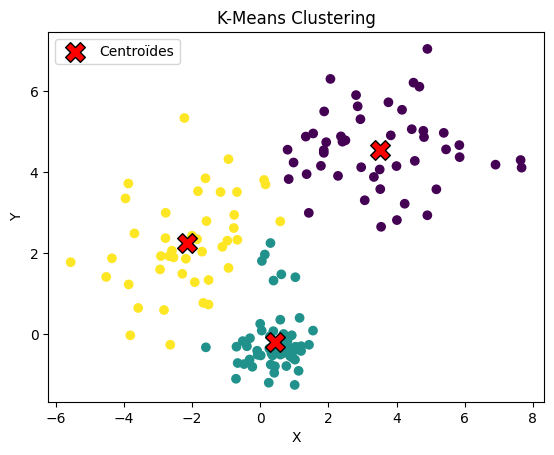

In [56]:
# Afficher les résultats
X_coords = [v[0] for v in vectors]
Y_coords = [v[1] for v in vectors]

plt.scatter(X_coords, Y_coords, c=kmeans.labels, cmap='viridis')
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], 
            c='red', marker='X', s=200, edgecolors='black', label='Centroïdes')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

### Exercice 15 : comment déterminer k ?

Dans cet exercice vous allez découvrir une méthode pour être guidé dans le choix de la valeur de *k*. En effet, une limite de k-means est que l’on doit déterminer à l’avance le nombre de clusters que l’on veut, or on n’a pas toujours d’hypothèse valable à ce sujet.

La méthode est finalement assez empirique.

Si vous avez bien suivi, vous savez que plus on augmente le nombre de clusters, plus l’inertie est basse. Nous avons d’ailleurs prévu une méthode dans notre classe qui calcule l’inertie finale, une fois le clustering réalisé.

In [49]:
print(f"Inertie finale : {kmeans.compute_inertia(vectors):.2f}")

Inertie finale : 370.50


On peut naïvement se dire qu’il faut augmenter le nombre de k tant que l’inertie baisse. Mais dans ce cas, tant que l’on va rajouter des clusters l’inertie va baisser, et sans critère d’arrêt, on va sans cesse rajouter des clusters, et à la fin on va se retrouver avec autant de clusters que de vecteurs à regrouper (car fatalement, plus il y a de clusters plus ils sont petits vu que le nombre total de vecteurs ne change pas). De plus, ça n’a aucun intérêt d’avoir trop de clusters, car on regroupe justement les données pour en simplifier la lecture et l’analyse. Il faut trouver un critère d’arrêt qui soit un bon compromis entre réduction de l’inertie et le nombre de clusters finaux.

Recherchons empiriquement ce critère : écrivez un code qui teste différentes valeurs de *k* (de 1 à 20 par exemple), calcule l’inertie finale obtenue pour chaque valeur de *k*, et utiliser un graphe pour visualiser la relation entre le nombre de clusters et l’inertie finale :

Convergence atteinte après 2 itérations
Convergence atteinte après 5 itérations
Convergence atteinte après 4 itérations
Convergence atteinte après 5 itérations
Convergence atteinte après 7 itérations
Convergence atteinte après 8 itérations
Convergence atteinte après 12 itérations
Convergence atteinte après 7 itérations
Convergence atteinte après 4 itérations
Convergence atteinte après 8 itérations
Convergence atteinte après 8 itérations
Convergence atteinte après 9 itérations
Convergence atteinte après 8 itérations
Convergence atteinte après 12 itérations
Convergence atteinte après 13 itérations
Convergence atteinte après 13 itérations
Convergence atteinte après 13 itérations
Convergence atteinte après 13 itérations
Convergence atteinte après 13 itérations
Convergence atteinte après 10 itérations


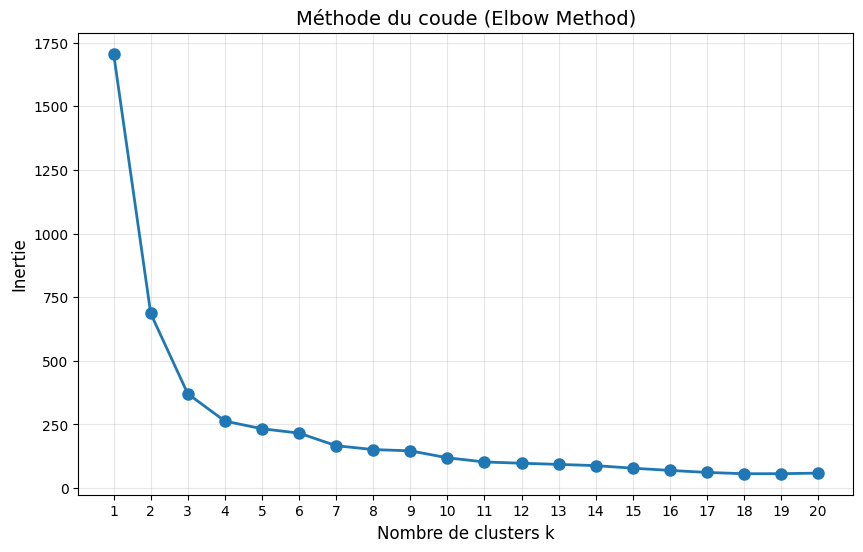

Cherchez le 'coude' où l'inertie diminue moins vite
   Ici, k=3 semble être un bon choix


In [60]:
# Exercice 15 : votre code 


#Tester différentes valeurs de k
inertias = []
K_range = range(1, 21)

for k in K_range:
    kmeans_temp = KMeans(k=k, random_state=42)
    kmeans_temp.fit(vectors)
    inertias.append(kmeans_temp.compute_inertia(vectors))

# Visualiser l’inertie finale en fonction du nombre de clusters choisis
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertias, 'o-', linewidth=2, markersize=8)
plt.xlabel('Nombre de clusters k', fontsize=12)
plt.xticks(K_range)
plt.ylabel('Inertie', fontsize=12)
plt.title('Méthode du coude (Elbow Method)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.show()

Normalement, vous devez constater qu’à partir d’un certain nombre de clusters, l’inertie ne baisse que de manière tangentielle. Il faut donc sélectionner le nombre de clusters à partir duquel l’inertie semble diminuer moins vite. Ici il semble que *k = 3* soit un bon choix.

Du fait de la forme de « coude » de la courbe, on appelle cette méthode « la méthode du coude » (*elbow* en anglais).

Cette méthode demande de faire les calcul pour différentes valeurs de *k*, mais comme cet algorithme n’est pas très coûteux en ressource, cela est tout à fait envisageable (dans une certaine limite).

### Visualiser la convergence

Nous avons eu la présence d’esprit de doter notre classe de la capacité à stocker l’état des clusters et des centroïdes à chaque itération. Voici une manière de les visualiser :

Convergence atteinte après 8 itérations


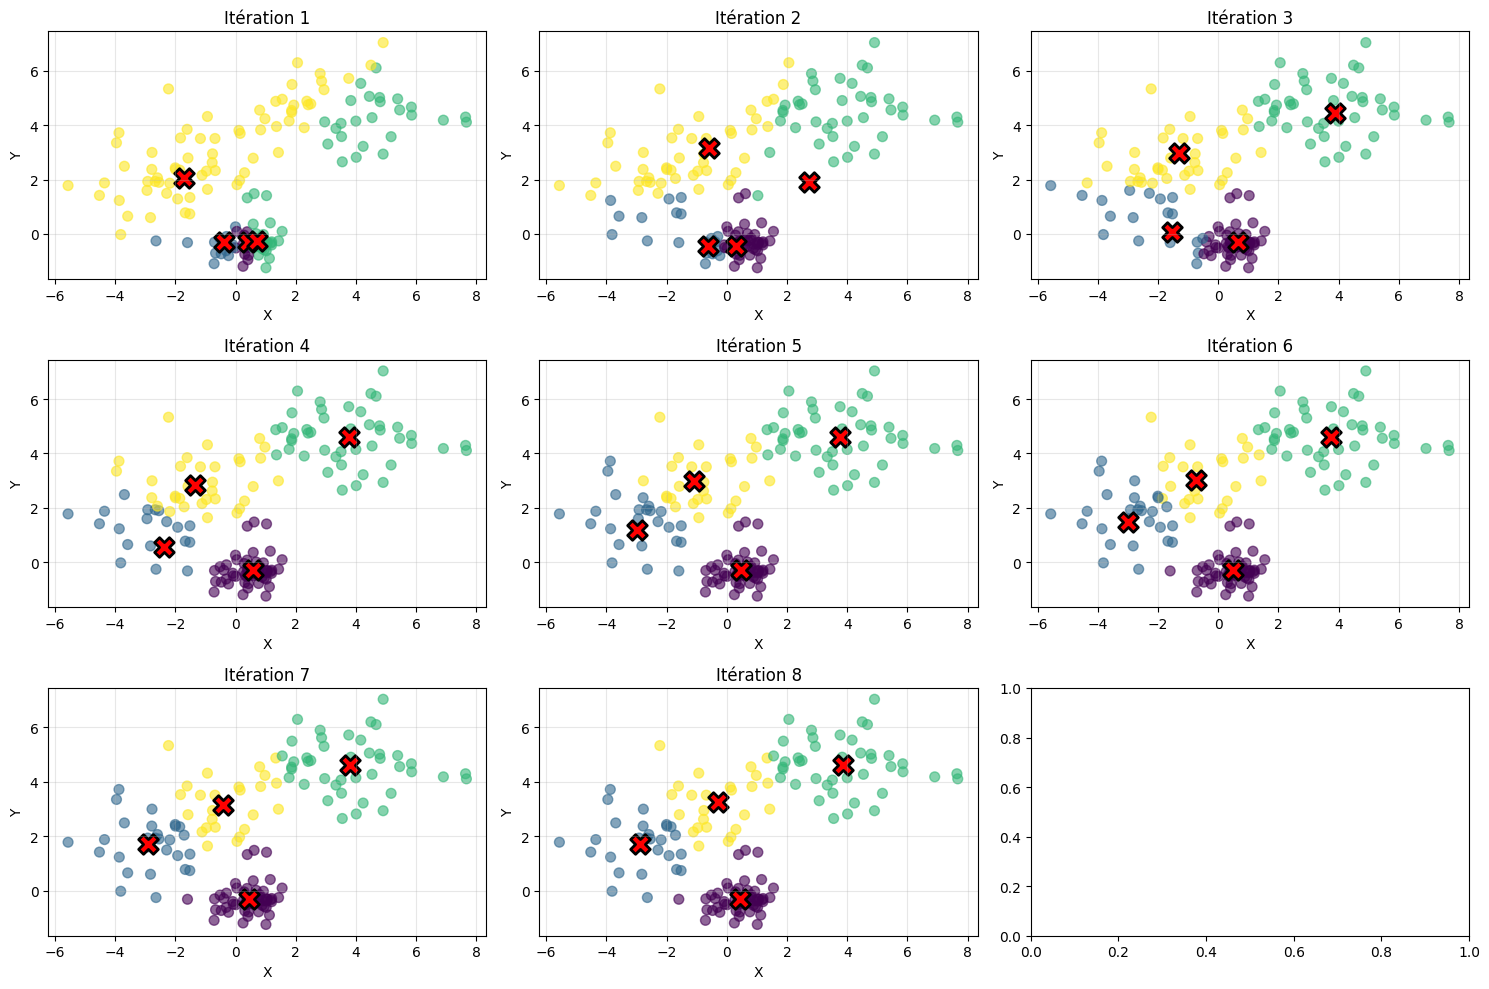

In [73]:
kmeans_hist = KMeans(4, random_state=8)
kmeans_hist.fit(vectors)

# Créer une animation des itérations de K-means
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
axes = axes.ravel()

# Convertir vectors en array pour faciliter l'indexation
X_array = np.array(vectors)

# Afficher quelques itérations
iterations_to_show = [0, 1, 2, 3, 4, 5, 6, 7, 8]
for idx, iter_num in enumerate(iterations_to_show):
    if iter_num < len(kmeans_hist.history):
        state = kmeans_hist.history[iter_num]
        
        axes[idx].scatter(X_array[:, 0], X_array[:, 1], 
                         c=state['labels'], s=50, 
                         alpha=0.6, cmap='viridis')
        axes[idx].scatter(state['centroids'][:, 0], 
                         state['centroids'][:, 1],
                         c='red', s=200, marker='X',
                         edgecolors='black', linewidths=2)
        axes[idx].set_title(f'Itération {iter_num + 1}')
        axes[idx].set_xlabel('X')
        axes[idx].set_ylabel('Y')
        axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Exercice final : mise en situation

Vous travaillez pour un site e-commerce. Vous avez des données sur vos clients :
- Montant total dépensé
- Nombre de commandes
- Ancienneté (en mois)

Le but de cet exercice va être de segmenter ces clients en groupes homogènes (clustering).

Générons ces données :

In [76]:
# Générer des données de clients fictives
np.random.seed(42)

# 3 types de clients
# Type 1 : Nouveaux clients, peu d'achats
clients_type1 = np.random.randn(100, 3) * [500, 2, 3] + [800, 3, 4]

# Type 2 : Clients réguliers moyens
clients_type2 = np.random.randn(100, 3) * [800, 3, 4] + [2500, 8, 18]

# Type 3 : Clients VIP, gros acheteurs
clients_type3 = np.random.randn(100, 3) * [1000, 4, 6] + [5000, 15, 30]

# Combiner en array numpy
X_clients_array = np.vstack([clients_type1, clients_type2, clients_type3])



En réalité, quand on utilise k-means pour faire du clustering, il vaut mieux utiliser des données standardisées. 

Utiliser la méthode `StandardScaler()` du module `sklearn.preprocessing` (cherchez dans la doc, ce n’est pas bien compliqué). afficher moyennes et écarts types de données avant et après standardisation.

In [80]:
# Exercice final : votre code

# Standardiser les données (important pour K-means !)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clients_array)

print("Standardisation importante !")
print("Avant : moyennes =", X_clients_array.mean(axis=0).round(2))
print("Avant : écarts-types =", X_clients_array.std(axis=0).round(2))
print()
print("Après : moyennes =", X_scaled.mean(axis=0).round(2))
print("Après : écarts-types =", X_scaled.std(axis=0).round(2))

Standardisation importante !
Avant : moyennes = [2816.15    8.53   17.62]
Avant : écarts-types = [1882.44    6.06   11.75]

Après : moyennes = [-0. -0.  0.]
Après : écarts-types = [1. 1. 1.]


Procédez à la segmentation en 3 groupes, et pour chaque cluster, indiquez le nombre de client, et la moyenne des montants, commandes et ancienneté.

In [79]:
# Attention ! convertir en liste de vecteurs numpy (nécessaire vu la façon dont on a implémenté KMeans - a modifier dans une prochaine version du cours)
X_clients = [np.array(row) for row in X_clients_array]

In [82]:
# Exercice final : votre code 

# Appliquer K-means
kmeans_clients = KMeans(k=3, random_state=42)
kmeans_clients.fit(X_scaled)

# Convertir X_clients en array pour faciliter l'analyse
X_clients_array = np.array(X_clients)

# Analyser les segments
print("\n" + "="*60)
print("ANALYSE DES SEGMENTS")
print("="*60)

for k in range(3):
    cluster_data = X_clients_array[kmeans_clients.labels == k]
    print(f"\nSegment {k+1} ({len(cluster_data)} clients) :")
    print(f"  Montant moyen : {cluster_data[:, 0].mean():.0f} €")
    print(f"  Commandes moyennes : {cluster_data[:, 1].mean():.1f}")
    print(f"  Ancienneté moyenne : {cluster_data[:, 2].mean():.1f} mois")

Convergence atteinte après 13 itérations

ANALYSE DES SEGMENTS

Segment 1 (95 clients) :
  Montant moyen : 5086 €
  Commandes moyennes : 15.7
  Ancienneté moyenne : 31.0 mois

Segment 2 (104 clients) :
  Montant moyen : 2654 €
  Commandes moyennes : 7.7
  Ancienneté moyenne : 18.4 mois

Segment 3 (101 clients) :
  Montant moyen : 848 €
  Commandes moyennes : 2.7
  Ancienneté moyenne : 4.3 mois


#### Un peu de visualisation :

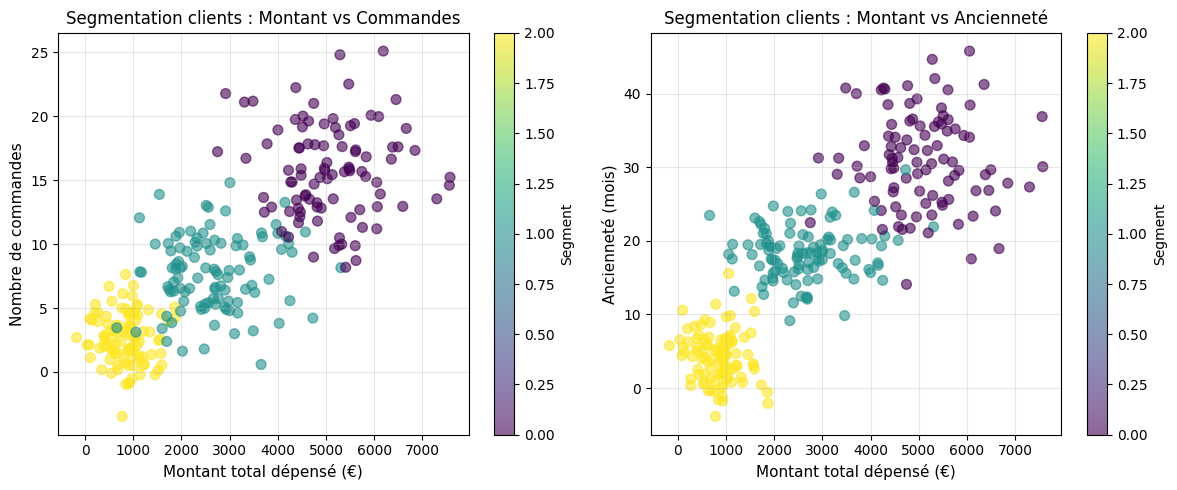

In [84]:
# Convertir X_clients en array pour la visualisation
X_clients_array = np.array(X_clients)

# Visualisation 2D (premières 2 dimensions)
plt.figure(figsize=(12, 5))

# Graphique 1 : Montant vs Nb commandes
plt.subplot(1, 2, 1)
scatter = plt.scatter(X_clients_array[:, 0], X_clients_array[:, 1], 
                     c=kmeans_clients.labels, s=50, alpha=0.6, cmap='viridis')
plt.xlabel('Montant total dépensé (€)', fontsize=11)
plt.ylabel('Nombre de commandes', fontsize=11)
plt.title('Segmentation clients : Montant vs Commandes')
plt.colorbar(scatter, label='Segment')
plt.grid(True, alpha=0.3)

# Graphique 2 : Montant vs Ancienneté
plt.subplot(1, 2, 2)
scatter = plt.scatter(X_clients_array[:, 0], X_clients_array[:, 2], 
                     c=kmeans_clients.labels, s=50, alpha=0.6, cmap='viridis')
plt.xlabel('Montant total dépensé (€)', fontsize=11)
plt.ylabel('Ancienneté (mois)', fontsize=11)
plt.title('Segmentation clients : Montant vs Ancienneté')
plt.colorbar(scatter, label='Segment')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

#### Bonus : 
* testez si k=3 est un bon choix
* comparer avec le k-means de scikit-learn
* réfléchir à : pourquoi la standardisation est importante ? Faites le clustering avec des données non standardiser pour comparer
* un peu de réflexion métier : comment interprétez vous ces segments/clusters ? quelle stratégie marketing proposer aux 3 segments ? 

### Limitations et extensions de K-means

####  Sensibilité à l'initialisation
Les résultats peuvent varier selon les centroïdes initiaux.  
**Solution** : opter pour une version de k-means qui dispose d’un initialisation « intelligente », ou relancer plusieurs fois.

#### Choix de k
Le nombre de clusters doit être fixé à l'avance.  
**Solution** : méthode du coude, on peut calculer un indice de la qualité du clustering, le [silouhette score](https://fr.wikipedia.org/wiki/Silhouette_(clustering)) par exemple (chercher aussi dans la doc de scikit-learn)

#### Hypothèse de clusters sphériques
Comme on mesure les distances dans toutes les directions de la même manière, K-means suppose des clusters de forme sphérique et de taille similaire.  
**Solution** : Pour des formes de clusters plus complexes, utiliser des algorithmes de clustering plus élaborés comme le [DBSCAN](https://fr.wikipedia.org/wiki/DBSCAN) ou le [clustering hiérarchique](https://fr.wikipedia.org/wiki/Regroupement_hi%C3%A9rarchique).

#### Sensibilité aux outliers
Les valeurs extrêmes influencent fortement les centroïdes.  
**Solution** : Détecter et retirer les outliers avant, ou utiliser des méthodes comme [K-medoids](https://fr.wikipedia.org/wiki/K-m%C3%A9do%C3%AFdes).